# Explore SMT2020 datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

Helpful documentation to use along side this notebook:
- Data dictionaries included with SMT2020 Datasets: https://p2schedgen.fernuni-hagen.de/index.php/downloads/simulation
- SMT2020 paper: https://ieeexplore.ieee.org/document/9115710

## High Volume Low Mix (HVLM)

### tool.txt

Info on tools with one tool fam (group of identical tools) per row.

In [2]:
tool = pd.read_csv("datasets/SMT2020_HVLM/tool.txt.1l", sep="\t")

In [78]:
tool

,STNFAM,STN,RULE,FWLRANK,WAKERESRANK,BATCHCRITF,BATCHPER,LTIME,LTUNITS,ULTIME,ULTUNITS,STNCAP,STNQTY,STNGRP,STNFAMSTEP_ACTLIST,STNFAMLOC,PRERULERWL,SETUPGRP
0,DE_BE_11,DE_BE_11,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,NaN,10.0,Dry_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
1,DE_BE_12,DE_BE_12,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,NaN,9.0,Dry_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
2,DE_BE_13,DE_BE_13,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,wake_LeastSetupTime,NaN,NaN,1.0,min,1.0,min,NaN,21.0,Dry_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
3,DE_BE_48,DE_BE_48,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,NaN,10.0,Dry_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
4,DE_BE_50,DE_BE_50,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,NaN,9.0,Dry_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,WE_FE_47,WE_FE_47,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,2.0,6.0,Wet_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
102,WE_FE_8,WE_FE_8,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,2.0,2.0,Wet_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
103,WE_FE_83,WE_FE_83,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,2.0,7.0,Wet_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
104,WE_FE_84,WE_FE_84,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,2.0,18.0,Wet_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN


Looks like a flattened version of tool.txt described in dataset documentation (repeated rows that only differ in FWLRANK are combined, for example, and multiple FWLRANK values are listed in one cell separated by ";").

In [5]:
tool.columns

Index(['STNFAM', 'STN', 'RULE', 'FWLRANK', 'WAKERESRANK', 'BATCHCRITF',
       'BATCHPER', 'LTIME', 'LTUNITS', 'ULTIME', 'ULTUNITS', 'STNCAP',
       'STNQTY', 'STNGRP', 'STNFAMSTEP_ACTLIST', 'STNFAMLOC', 'PRERULERWL',
       'SETUPGRP'],
      dtype='object')

In [6]:
# how many distinct STNFAM?
tool["STNFAM"].nunique()

106

Text(0, 0.5, 'Freq')

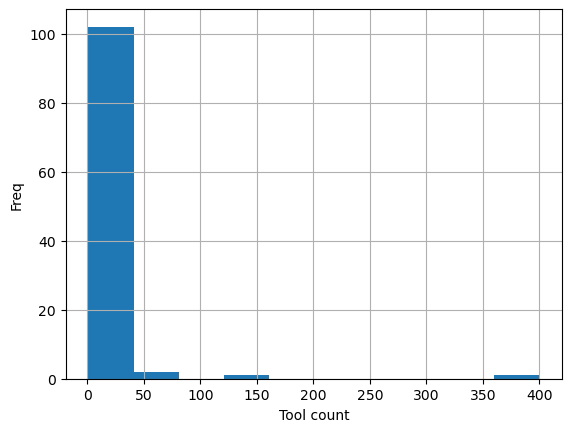

In [7]:
# distribution of STNQTY (num tools in tool fam)
ax = tool["STNQTY"].hist()
ax.set_xlabel("Tool count")
ax.set_ylabel("Freq")

In [8]:
# what are the tool fams with very high tool counts?
tool.set_index("STNFAM")["STNQTY"].sort_values(ascending=False)

STNFAM
Delay_32             400.0
DE_FE_86             135.0
LithoTrack_FE_115     51.0
LithoTrack_FE_95      49.0
WE_FE_108             35.0
                     ...  
TF_Met_FE_45           2.0
DefMet_BE_42           1.0
DefMet_FE_106          1.0
EPI_38                 1.0
WE_BE_7                1.0
Name: STNQTY, Length: 106, dtype: float64

In [9]:
tool.set_index("STNFAM").loc["Delay_32"]

STN                                                              Delay1
RULE                                                   rule_HotLotFIRST
FWLRANK                                   rank_HP;rank_RSETUP;rank_FIFO
WAKERESRANK                                                         NaN
BATCHCRITF                                                          NaN
BATCHPER                                                            NaN
LTIME                                                               0.0
LTUNITS                                                             min
ULTIME                                                              0.0
ULTUNITS                                                            min
STNCAP                                                              NaN
STNQTY                                                            400.0
STNGRP                                                         Delay_32
STNFAMSTEP_ACTLIST    Custom_actlist_ASISemiOpersDuringSetupAndA

In [10]:
tool.set_index("STNFAM").loc["DE_FE_86"]

STN                                                            DE_FE_86
RULE                                                   rule_HotLotFIRST
FWLRANK                                   rank_HP;rank_RSETUP;rank_FIFO
WAKERESRANK                                                         NaN
BATCHCRITF                                                          NaN
BATCHPER                                                            NaN
LTIME                                                               1.0
LTUNITS                                                             min
ULTIME                                                              1.0
ULTUNITS                                                            min
STNCAP                                                              NaN
STNQTY                                                            135.0
STNGRP                                                         Dry_Etch
STNFAMSTEP_ACTLIST    Custom_actlist_ASISemiOpersDuringSetupAndA

**Q**: Delay steps are mentioned in documentation - what are these?

**Q**: Does tool count make sense for Dry Etch step?

Text(0, 0.5, 'Freq')

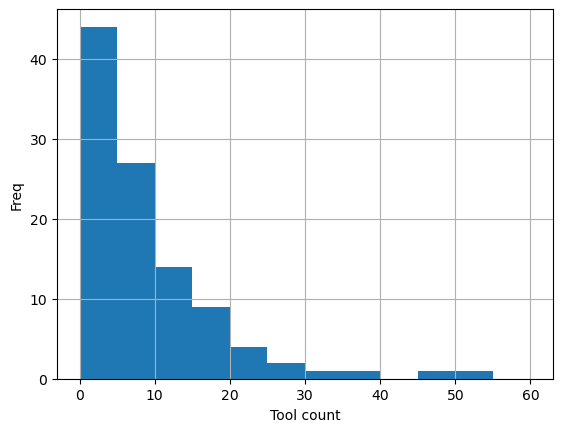

In [11]:
# replot excluding Delay and Dry Etch tool fams with high tool counts
ax = tool["STNQTY"].hist(range=(0, 60), bins=12)
ax.set_xlabel("Tool count")
ax.set_ylabel("Freq")

In [12]:
# tool fam count by tool group (mfg area)
tool.groupby("STNGRP")["STNGRP"].count()

STNGRP
Def_Met        7
Delay_32       1
Dielectric    10
Diffusion     10
Dry_Etch      21
Implant        9
Litho         11
Litho_Met      4
Planar         6
TF            11
TF_Met         2
Wet_Etch      14
Name: STNGRP, dtype: int64

In [13]:
# tool count by tool group
tool.groupby("STNGRP")["STNQTY"].sum()

STNGRP
Def_Met        16.0
Delay_32      400.0
Dielectric     59.0
Diffusion      75.0
Dry_Etch      362.0
Implant        35.0
Litho         203.0
Litho_Met      53.0
Planar         34.0
TF             90.0
TF_Met          4.0
Wet_Etch      112.0
Name: STNQTY, dtype: float64

Tool fam & tool counts match documentation (IEEE paper), but Delay_32 was not mentioned in paper.

**Q**: What is Delay_32 tool group?

In [43]:
tool["STNFAMLOC"].value_counts()

STNFAMLOC
Fab      105
Delay      1
Name: count, dtype: int64

In [44]:
tool.loc[tool["STNFAMLOC"] == "Delay"]

,STNFAM,STN,RULE,FWLRANK,WAKERESRANK,BATCHCRITF,BATCHPER,LTIME,LTUNITS,ULTIME,ULTUNITS,STNCAP,STNQTY,STNGRP,STNFAMSTEP_ACTLIST,STNFAMLOC,PRERULERWL,SETUPGRP
28,Delay_32,Delay1,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,0.0,min,0.0,min,NaN,400.0,Delay_32,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Delay,no,NaN


All tools have location "Fab" except for delay step. Tools are assumed to be located in the same general location and transportation time between tools is modeled as a uniform r.v. with mean = 7.5 and offset = 2.5 (see fromto.txt).

**Q**: Does PySCFabSim have ability to model transportation time between tools, if an input dataset with multiple tool locations is used?

In [46]:
tool["LTIME"].value_counts()

LTIME
1.0    105
0.0      1
Name: count, dtype: int64

In [49]:
tool["ULTIME"].value_counts()

ULTIME
1.0    105
0.0      1
Name: count, dtype: int64

In [52]:
tool.loc[(tool["LTIME"] == 0) | (tool["ULTIME"] == 0)]

,STNFAM,STN,RULE,FWLRANK,WAKERESRANK,BATCHCRITF,BATCHPER,LTIME,LTUNITS,ULTIME,ULTUNITS,STNCAP,STNQTY,STNGRP,STNFAMSTEP_ACTLIST,STNFAMLOC,PRERULERWL,SETUPGRP
28,Delay_32,Delay1,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,0.0,min,0.0,min,NaN,400.0,Delay_32,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Delay,no,NaN


All tools have load and unload time (LTIME, ULTIME) of 1 min except for delay step.

**Q**: Is variable load and unload time implemented in PySCFabSim?

Per doc: "Note that load and unload times are not included in the processing time. At first, a lot is loaded, processing then occurs, and finally, the lot is unloaded. To implement this behavior, it is necessary to use an appropriate action list."

**Q**: How does action list (STNFAMSTEP_ACTLIST) work exactly?

In [80]:
tool["RULE"].value_counts()

RULE
rule_HotLotFIRST    103
rule_LSSU             3
Name: count, dtype: int64

In [81]:
tool.loc[tool["RULE"] == "rule_LSSU"]

,STNFAM,STN,RULE,FWLRANK,WAKERESRANK,BATCHCRITF,BATCHPER,LTIME,LTUNITS,ULTIME,ULTUNITS,STNCAP,STNQTY,STNGRP,STNFAMSTEP_ACTLIST,STNFAMLOC,PRERULERWL,SETUPGRP
52,Implant_128,Implant_128,rule_LSSU,rank_HP;rank_RSETUP;rank_FIFO,wake_LeastSetupTime,NaN,NaN,1.0,min,1.0,min,2.0,10.0,Implant,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,Implant_Gas
53,Implant_132,Implant_132,rule_LSSU,rank_HP;rank_RSETUP;rank_FIFO,wake_LeastSetupTime,NaN,NaN,1.0,min,1.0,min,2.0,8.0,Implant,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,Implant_Gas
57,Implant_91,Implant_91,rule_LSSU,rank_HP;rank_RSETUP;rank_FIFO,wake_LeastSetupTime,NaN,NaN,1.0,min,1.0,min,2.0,6.0,Implant,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,Implant_Gas


rule_LSSU refers to setup avoidance rule for implant. Name of rule is given in SETUPGRP column and details for rule is given in setupgrp.txt.

In [87]:
tool.loc[~tool["BATCHPER"].isna()]

,STNFAM,STN,RULE,FWLRANK,WAKERESRANK,BATCHCRITF,BATCHPER,LTIME,LTUNITS,ULTIME,ULTUNITS,STNCAP,STNQTY,STNGRP,STNFAMSTEP_ACTLIST,STNFAMLOC,PRERULERWL,SETUPGRP
39,Diffusion_BE_123,Diffusion_BE_123,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,crit_sameroutestep,piece,1.0,min,1.0,min,NaN,12.0,Diffusion,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
40,Diffusion_FE_100,Diffusion_FE_100,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,crit_sameroutestep,piece,1.0,min,1.0,min,NaN,2.0,Diffusion,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
41,Diffusion_FE_101,Diffusion_FE_101,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,crit_sameroutestep,piece,1.0,min,1.0,min,NaN,7.0,Diffusion,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
42,Diffusion_FE_120,Diffusion_FE_120,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,crit_sameroutestep,piece,1.0,min,1.0,min,NaN,11.0,Diffusion,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
43,Diffusion_FE_122,Diffusion_FE_122,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,crit_sameroutestep,piece,1.0,min,1.0,min,NaN,5.0,Diffusion,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
44,Diffusion_FE_125,Diffusion_FE_125,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,crit_sameroutestep,piece,1.0,min,1.0,min,NaN,4.0,Diffusion,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
45,Diffusion_FE_126,Diffusion_FE_126,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,crit_sameroutestep,piece,1.0,min,1.0,min,NaN,3.0,Diffusion,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
46,Diffusion_FE_127,Diffusion_FE_127,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,crit_sameroutestep,piece,1.0,min,1.0,min,NaN,9.0,Diffusion,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
47,Diffusion_FE_44,Diffusion_FE_44,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,crit_sameroutestep,piece,1.0,min,1.0,min,NaN,11.0,Diffusion,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
48,Diffusion_FE_94,Diffusion_FE_94,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,crit_sameroutestep,piece,1.0,min,1.0,min,NaN,11.0,Diffusion,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN


Per doc:

BATCHPER = "piece" means batching is done based on number of wafers (min and max batch sizes are defined in route files).

BATCHCRITF = "crit_sameroutestep" means only wafers for the same product (i.e. route) can be batched together.

crit_samepartfam and crit_samestepname (along with PARTFAM definition in part.txt) can be used to batch production and engineering lots of the same product together (not used in PySCFabsim since sample code only deals with product lots - or at least is demo'ed on product lots only).

### part.txt

Info on products and associated routes, with one product per row.

In [14]:
part = pd.read_csv("datasets/SMT2020_HVLM/part.txt", sep="\t")

In [15]:
part.shape

(2, 5)

In [16]:
part

,PARTGRP,PARTFAM,PART,ROUTEFILE,ROUTE
0,Saleable,product_3,part_3,route_3.txt,r_3
1,Saleable,product_4,part_4,route_4.txt,r_4


### route_i.txt

Info on each process step for a specific route, with one step per row, listed in order of processing sequence.

In [17]:
route_3 = pd.read_csv("datasets/SMT2020_HVLM/route_3.txt", sep="\t")

In [18]:
route_3.shape

(583, 29)

In [19]:
route_3.head()

,ROUTE,STEP,DESC,STNFAM,PDIST,PTIME,PTIME2,PTUNITS,PTPER,BATCHMN,...,PartInterval,PartIntUnits,RWKSTEP,REWORK,RWKTYPE,StepPercent,STEP_CQT,CQT,CQTUNITS,IGNORE
0,r_3,1,001_Diffusion,Diffusion_FE_120,uniform,501.330,25.0665,min,per_batch,125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diffusion
1,r_3,2,002_Wet_Etch,WE_FE_84,uniform,0.852,0.0426,min,per_piece,NaN,...,0.639,min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wet_Etch
2,r_3,3,003_Def_Met,DefMEt_FE_118,uniform,17.994,0.8997,min,per_lot,NaN,...,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,Def_Met
3,r_3,4,007_TF_Met,TF_Met_FE_45,uniform,8.514,0.4257,min,per_lot,NaN,...,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,TF_Met
4,r_3,5,008_Diffusion,Diffusion_FE_127,uniform,437.580,21.8790,min,per_batch,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diffusion


In [20]:
route_3.loc[0]

ROUTE                         r_3
STEP                            1
DESC                001_Diffusion
STNFAM           Diffusion_FE_120
PDIST                     uniform
PTIME                      501.33
PTIME2                    25.0665
PTUNITS                       min
PTPER                   per_batch
BATCHMN                     125.0
BATCHMX                     150.0
SETUP                         NaN
WHEN                          NaN
STIME                         NaN
STUNITS                       NaN
SVESTN                        NaN
FORSTEP                       NaN
BatchInterval                 NaN
BatchIntUnits                 NaN
PartInterval                  NaN
PartIntUnits                  NaN
RWKSTEP                       NaN
REWORK                        NaN
RWKTYPE                       NaN
StepPercent                   NaN
STEP_CQT                      NaN
CQT                           NaN
CQTUNITS                      NaN
IGNORE                  Diffusion
Name: 0, dtype

In [70]:
1 - route_3["SETUP"].isna().mean()

np.float64(0.09948542024013718)

~10% steps require setup.

In [77]:
route_3.loc[~route_3["SETUP"].isna(), ["DESC", "STNFAM", "SETUP", "WHEN", "STIME", "STUNITS"]]

,DESC,STNFAM,SETUP,WHEN,STIME,STUNITS
11,015_Litho,LithoTrack_FE_115,SU015_3,need,8.0,min
16,020_Implant,Implant_128,SU128_3,need,NaN,NaN
31,036_Litho,LithoTrack_FE_115,SU036_3,need,8.0,min
60,068_Implant,Implant_132,SU132_3,need,NaN,NaN
67,075_Implant,Implant_128,SU128_1,need,NaN,NaN
74,082_Implant,Implant_132,SU132_1,need,NaN,NaN
81,089_Implant,Implant_132,SU132_2,need,NaN,NaN
87,095_Implant,Implant_132,SU132_1,need,NaN,NaN
108,118_Implant,Implant_91,SU91_1,need,NaN,NaN
111,121_Litho,LithoTrack_FE_115,SU121_3,need,8.0,min


In [86]:
route_3.loc[~route_3["BATCHMN"].isna(), ["DESC", "STNFAM", "BATCHMN", "BATCHMX"]]

,DESC,STNFAM,BATCHMN,BATCHMX
0,001_Diffusion,Diffusion_FE_120,125.0,150.0
4,008_Diffusion,Diffusion_FE_127,100.0,125.0
23,027_Diffusion,Diffusion_FE_44,100.0,125.0
99,109_Diffusion,Diffusion_FE_120,75.0,100.0
100,110_Diffusion,Diffusion_FE_127,100.0,125.0
170,198_Diffusion,Diffusion_FE_100,125.0,150.0
173,201_Diffusion,Diffusion_FE_122,125.0,150.0
190,220_Diffusion,Diffusion_FE_101,125.0,150.0
223,256_Diffusion,Diffusion_FE_101,125.0,150.0
260,297_Diffusion,Diffusion_FE_126,100.0,125.0


Diffusion steps use batching - min and max batch sizes (number of wafers) are given in BATCHMN and BATCHMX.

In [21]:
route_4 = pd.read_csv("datasets/SMT2020_HVLM/route_4.txt", sep="\t")

In [22]:
route_4.shape

(343, 29)

### order.txt

Info on lots to be released into simulation model, with one order (combination of product and priority?) per row.

In [23]:
order = pd.read_csv("datasets/SMT2020_HVLM/order.txt", sep="\t")

In [24]:
order.shape

(5, 13)

In [25]:
order

,LOT,PART,PRIOR,PIECES,START,RDIST,REPEAT,RUNITS,RPT#,LOTSPERRPT,DUE,ORDER,HOTLOT
0,Lot_3,part_3,10,25,01/01/18 00:00:00,constant,51.69,min,200000,1,02/23/18 20:07:47,O_Lot_3,no
1,Lot_4,part_4,10,25,01/01/18 00:00:00,constant,51.69,min,200000,1,01/31/18 07:29:20,O_Lot_4,no
2,HotLot_3,part_3,20,25,01/01/18 00:00:00,constant,2016.00,min,20000,1,02/03/18 07:59:15,O_HotLot_3,no
3,HotLot_4,part_4,20,25,01/01/18 00:00:00,constant,2016.00,min,20000,1,01/20/18 13:17:36,O_HotLot_4,no
4,SuperHotLot_3,part_3,30,25,01/01/18 00:00:00,constant,27397.61,min,2000,1,02/03/18 05:13:01,O_SuperHotLot_3,no


**Q**: Is this table used to configure lot release cadence? So each order/row represents a different cadence?

### attach.txt

Info to connect downtime event (scheduled and unscheduled) with tool groups (area) or family, where each row is a downtime event.

In [26]:
attach = pd.read_csv("datasets/SMT2020_HVLM/attach.txt", sep="\t")

In [30]:
attach

,CALNAME,CALTYPE,RESTYPE,RESNAME,FOADIST,FOA,FOAUNITS
0,BREAK_Def_Met,down,stngrp,Def_Met,exponential,10080.0,min
1,BREAK_Dielectric,down,stngrp,Dielectric,exponential,10080.0,min
2,BREAK_Diffusion,down,stngrp,Diffusion,exponential,10080.0,min
3,BREAK_Dry_Etch,down,stngrp,Dry_Etch,exponential,10080.0,min
4,BREAK_Implant,down,stngrp,Implant,exponential,10080.0,min
...,...,...,...,...,...,...,...
298,WE_FE_84_MN,pm,stnfam,WE_FE_84,constant,47883.0,NaN
299,WE_FE_84_QT,pm,stnfam,WE_FE_84,constant,143650.0,NaN
300,WE_FE_85_WK,pm,stnfam,WE_FE_85,constant,6675.0,NaN
301,WE_FE_85_MN,pm,stnfam,WE_FE_85,constant,28925.0,NaN


FOA = "first one at": refers to mean (FOA), distribution (FOADIST), and unit (FOAUNITS) of first downtime event.

Note on FOADIST = "constant" from doc: "The constant distribution means that the first PM for the tools of a tool set is evenly distributed based on the value in the column FOA. For example, a FOA value of 80 days with four tools lead to PMs for tool 1, 2, 3, and 4 at the following days: 20, 40, 60, and 80. For counter-based PMs it works in the same way, but FOAUNITS are not necessary."

### downcal.txt

Info on unscheduled downtimes (breakdowns), with one row per downtime event.

In [32]:
downcal = pd.read_csv("datasets/SMT2020_HVLM/downcal.txt", sep="\t")

In [33]:
downcal

,DOWNCALNAME,DOWNCALTYPE,MTTFDIST,MTTF,MTTFUNITS,MTTRDIST,MTTR,MTTRUNITS,IGNORE
0,BREAK_Def_Met,mttf_by_cal,exponential,10080,min,exponential,35.28,min,Def_Met
1,BREAK_Dielectric,mttf_by_cal,exponential,10080,min,exponential,604.80,min,Dielectric
2,BREAK_Diffusion,mttf_by_cal,exponential,10080,min,exponential,151.20,min,Diffusion
3,BREAK_Dry_Etch,mttf_by_cal,exponential,10080,min,exponential,231.84,min,Dry_Etch
4,BREAK_Implant,mttf_by_cal,exponential,10080,min,exponential,604.80,min,Implant
5,BREAK_Litho,mttf_by_cal,exponential,10080,min,exponential,705.59,min,Litho
6,BREAK_Litho_Met,mttf_by_cal,exponential,10080,min,exponential,35.28,min,Litho_Met
7,BREAK_Planar,mttf_by_cal,exponential,10080,min,exponential,201.60,min,Planar
8,BREAK_TF,mttf_by_cal,exponential,10080,min,exponential,453.60,min,TF
9,BREAK_TF_Met,mttf_by_cal,exponential,10080,min,exponential,35.28,min,TF_Met


Time to failure (TTF) follows an exponential distribution and the mean (MTTF) is the same for all areas (10,080 min or 7 days).

Time to repair (TTR) follows an exponential distribution and the mean (MTTR) differs by area (~35 min to ~700 min or ~12 hrs).

### pmcal.txt

Info on scheduled downtimes (preventative maintenance), with one row per downtime event.

In [34]:
pmcal = pd.read_csv("datasets/SMT2020_HVLM/pmcal.txt", sep="\t")

In [35]:
pmcal

,PMCALNAME,PMCALTYPE,MTBPM,MTBPMUNITS,MTTRDIST,MTTR,MTTR2,MTTRUNITS,IGNORE
0,DefMet_BE_33_MN,mtbpm_by_cal,30,day,uniform,13.76,2.75,hr,Def_Met
1,DefMet_BE_33_QT,mtbpm_by_cal,91,day,uniform,27.52,5.50,hr,Def_Met
2,DefMet_BE_42_MN,mtbpm_by_cal,30,day,uniform,13.76,2.75,hr,Def_Met
3,DefMet_BE_42_QT,mtbpm_by_cal,91,day,uniform,27.52,5.50,hr,Def_Met
4,DefMet_FE_10_MN,mtbpm_by_cal,30,day,uniform,13.76,2.75,hr,Def_Met
...,...,...,...,...,...,...,...,...,...
287,WE_FE_84_MN,mtbpm_by_pieces,46944,pieces,uniform,16.71,3.34,hr,Wet_Etch
288,WE_FE_84_QT,mtbpm_by_pieces,140833,pieces,uniform,33.42,6.68,hr,Wet_Etch
289,WE_FE_85_WK,mtbpm_by_pieces,7500,pieces,uniform,8.36,1.67,hr,Wet_Etch
290,WE_FE_85_MN,mtbpm_by_pieces,32500,pieces,uniform,16.71,3.34,hr,Wet_Etch


Text(0, 0.5, 'Number of tool families')

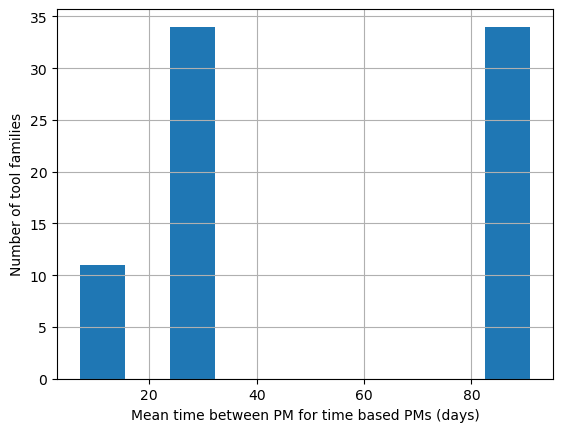

In [38]:
ax = pmcal.loc[pmcal["PMCALTYPE"] == "mtbpm_by_cal", "MTBPM"].hist()
ax.set_xlabel("Mean time between PM for time based PMs (days)")
ax.set_ylabel("Number of tool families")

Time-based PMs occur at weekly (7 days), monthly (30 days), and quarterly (91 days) intervals.

Text(0, 0.5, 'Number of tool families')

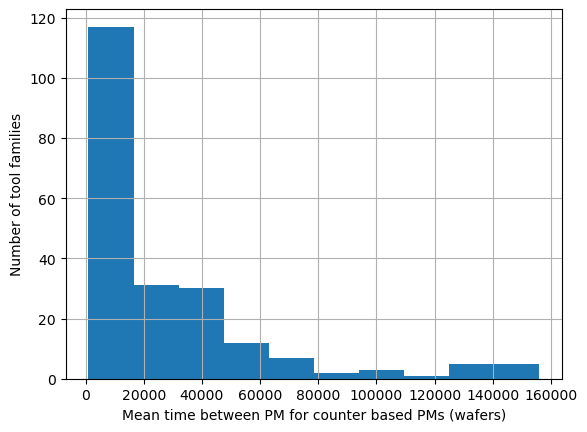

In [39]:
ax = pmcal.loc[pmcal["PMCALTYPE"] == "mtbpm_by_pieces", "MTBPM"].hist()
ax.set_xlabel("Mean time between PM for counter based PMs (wafers)")
ax.set_ylabel("Number of tool families")

### fromto.txt

Info on transportation times between locations, with one from-to location pair per row. 

In [54]:
fromto = pd.read_csv("datasets/SMT2020_HVLM/fromto.txt", sep="\t")

In [41]:
fromto

,FROMLOC,TOLOC,DDIST,DTIME,DTIME2,DUNITS
0,Fab,Fab,uniform,7.5,2.5,min


Only one location is defined for the testbed. See notes for tools.txt.

### setup.txt & setupgrp.txt

In [55]:
setup = pd.read_csv("datasets/SMT2020_HVLM/setup.txt", sep="\t")

In [56]:
setup

,CURSETUP,NEWSETUP,STIME,STUNITS,IGNORE
0,DE_BE_13_1,DE_BE_13_2,7,min,DE_BE_13
1,DE_BE_13_2,DE_BE_13_1,12,min,DE_BE_13
2,DE_BE_66_1,DE_BE_66_2,15,min,DE_BE_66
3,DE_BE_66_2,DE_BE_66_1,10,min,DE_BE_66
4,NaN,SU128_1,72,min,Implant_128
5,NaN,SU128_2,72,min,Implant_128
6,NaN,SU128_3,72,min,Implant_128
7,NaN,SU132_1,60,min,Implant_132
8,NaN,SU132_2,60,min,Implant_132
9,NaN,SU132_3,60,min,Implant_132


Per doc:
 - Sequence-independent setups (e.g. for litho) is defined in routes files (STIME and STUNITS columns)
 - In setup file, if CURSETUP is empty, the row provides setup info for any current setup to the new setup
 - In setup file, if both CURSETUP and NEWSETUP are provided, the row provides setup info from the specified current setup to the new step

In [57]:
setupgrp = pd.read_csv("datasets/SMT2020_HVLM/setupgrp.txt", sep="\t")

In [58]:
setupgrp

,SETUPGRP,SETUP,MINRUN,IGNORE
0,Implant_Gas,SU128_1,7,Implant_128
1,NaN,SU128_2,7,Implant_128
2,NaN,SU128_3,7,Implant_128
3,NaN,SU132_1,7,Implant_132
4,NaN,SU132_2,7,Implant_132
5,NaN,SU132_3,7,Implant_132
6,NaN,SU91_1,7,Implant_91
7,NaN,SU91_2,7,Implant_91
8,NaN,SU91_3,7,Implant_91


**Q**: Here, MINRUN (min number of lots required before a new setup, due to long setup times) is used -- what other setup avoidance rules can be/should be accommodated here?